In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [25]:
file_path = r"C:\Users\admin\OneDrive\Desktop\CODSOFT\Titanic-Dataset.csv"
t_data=pd.read_csv(file_path)

In [26]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
t_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
t_data.shape

(891, 12)

In [29]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
t_data.drop(columns='Cabin', axis=1, inplace=True)

In [32]:
Age = t_data['Age'].mean()

In [33]:
t_data['Age'].fillna(Age, inplace = True)

In [34]:
Fare = t_data['Fare'].mean()

In [35]:
t_data['Fare'].fillna(Fare, inplace = True)

In [36]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [37]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [38]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

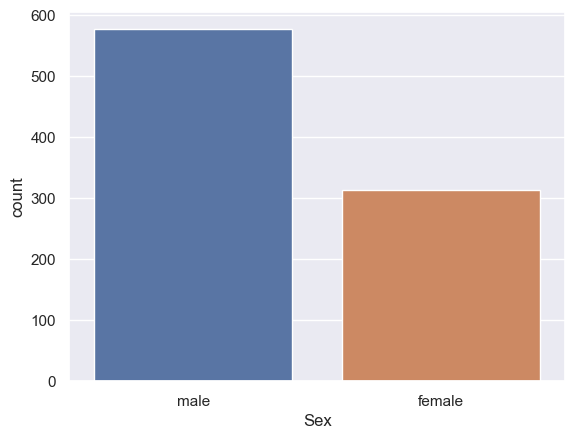

In [39]:
sns.countplot(x='Sex', data=t_data)

In [40]:
t_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

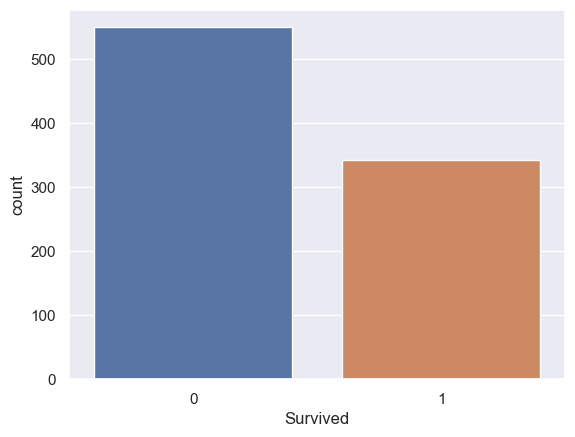

In [41]:
sns.countplot(x='Survived', data=t_data)

In [45]:
t_data['Sex'] = t_data['Sex'].astype(str)
t_data['Survived'] = t_data['Survived'].astype(str)

<Axes: xlabel='Sex', ylabel='count'>

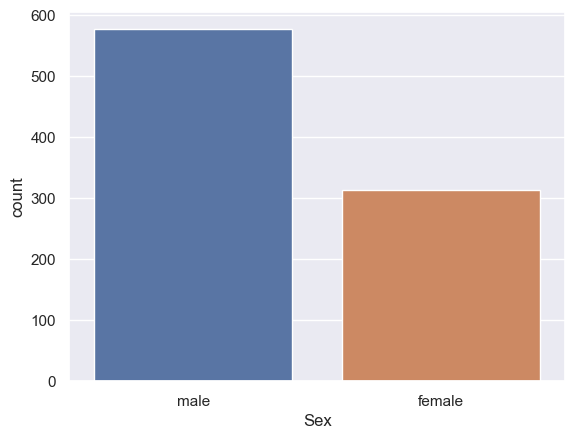

In [46]:
sns.countplot(x='Sex', data=t_data)

<Axes: xlabel='Sex', ylabel='count'>

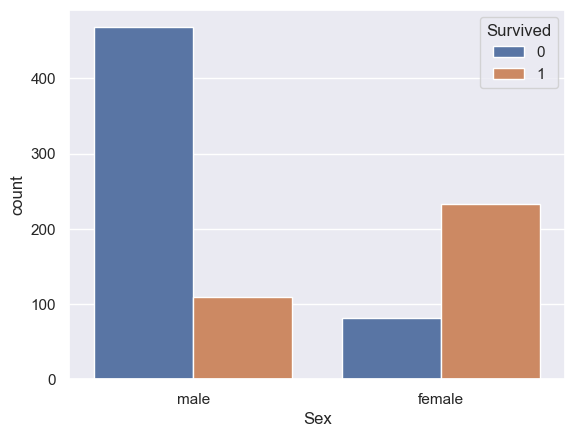

In [47]:
sns.countplot (x='Sex', hue = 'Survived', data = t_data)

In [48]:
t_data[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [49]:
 t_data[['Survived', 'Pclass' ]]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


<Axes: xlabel='Pclass', ylabel='count'>

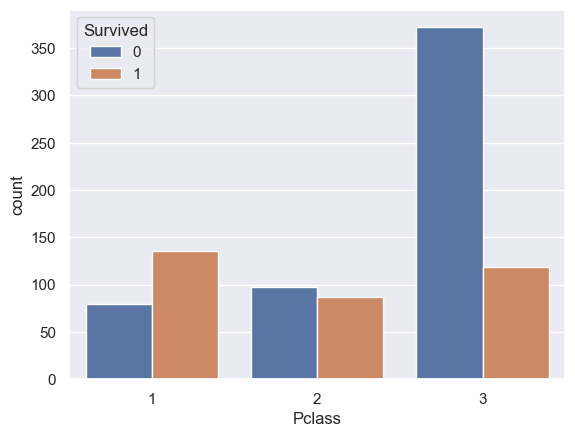

In [50]:
sns.countplot(x ='Pclass',hue= 'Survived', data=t_data)

In [51]:
t_data.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [52]:
t_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1.0


In [53]:
t_data.drop(columns={'PassengerId','Name','Ticket'},axis=1, inplace=True)

In [54]:
t_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,29.699118,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


In [55]:
X = t_data.drop(columns='Survived', axis=1)
Y = t_data['Survived']

In [56]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [58]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
dtype: int64

In [59]:
model = LogisticRegression()

In [66]:
nan_columns = X_train.columns[X_train.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['Embarked']


In [73]:
from sklearn.impute import SimpleImputer

# Example imputation for numerical columns with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_train.dropna(inplace=True)

In [75]:
model = LogisticRegression(max_iter=1000)
#model = LogisticRegression()
model.fit(X_train_imputed, Y_train)


LogisticRegression(max_iter=1000)

In [77]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (711, 7)
Y_train shape: (712,)


In [78]:
if X_train.shape[0] > Y_train.shape[0]:
    X_train = X_train[:-1]
elif X_train.shape[0] < Y_train.shape[0]:
    Y_train = Y_train[:-1]

In [79]:
print("Adjusted X_train shape:", X_train.shape)
print("Adjusted Y_train shape:", Y_train.shape)

Adjusted X_train shape: (711, 7)
Adjusted Y_train shape: (711,)


In [80]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [86]:
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [87]:
#X_test_prediction = model.predict(X_test_imputed)

In [88]:
X_test_prediction = model.predict(X_test)

In [89]:
print(X_test_prediction)

['0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '0' '0'
 '1' '1' '0' '1' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '1' '0' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '1' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0'
 '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '1' '0' '0' '0' '1' '0']


In [91]:

X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)


X_test_prediction = model.predict(X_test_imputed)

Y_test_array = Y_test.values

# Calculate accuracy
testing_data_accuracy = accuracy_score(Y_test_array, X_test_prediction)

In [92]:
print('Accuracy score of test data is => ',testing_data_accuracy)

Accuracy score of test data is =>  0.776536312849162


In [95]:

Y_test_array = Y_test.values

# Calculate precision score
test_data_precision = precision_score(Y_test_array, X_test_prediction, pos_label='1')

# Or if '0' is the positive class:
# test_data_precision = precision_score(Y_test_array, X_test_prediction, pos_label='0')

print(f"Precision on test data => {test_data_precision}")

Precision on test data => 0.7384615384615385


In [98]:
pos_label = '1'

# Compute recall score on test data
test_data_recall = recall_score(Y_test, X_test_prediction, pos_label=pos_label)

print(f"Recall on test data: {test_data_recall}")

Recall on test data: 0.676056338028169


In [99]:
from sklearn import metrics

In [102]:
print(X.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [103]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Transform X_test (using the imputer fitted on X_train)
X_test_imputed = imputer.transform(X_test)

In [106]:
model = LogisticRegression(max_iter=2000, solver='saga', penalty='l1')

# Fit the model on the imputed training data
model.fit(X_train_imputed, Y_train)

# Evaluate the model on the imputed test data
score = model.score(X_test_imputed, Y_test)
print(f"Accuracy on test data: {score}")

Accuracy on test data: 0.7486033519553073


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [108]:
X_train_prediction = model.predict(X_train_imputed)

# Compute the confusion matrix
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[422  22]
 [151 117]]


Text(0.5, 1.0, "('Accuracy Score :', 0.7486033519553073)")

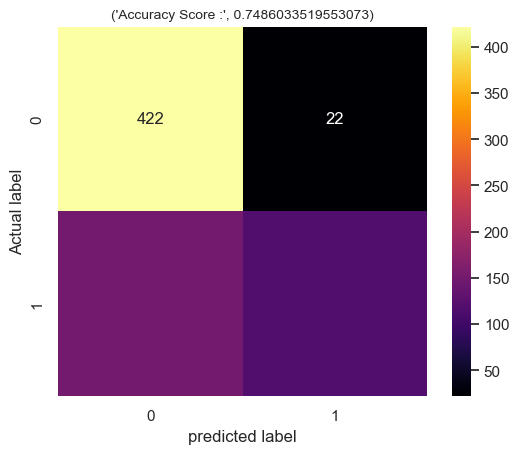

In [109]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap= "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 10)

In [111]:
from sklearn.metrics import classification_report

# Assuming you have already trained your model on X_train_imputed and Y_train
# and predicted on X_test_imputed
X_test_prediction = model.predict(X_test_imputed)

# Generate and print the classification report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       105
           1       0.87      0.46      0.60        74

    accuracy                           0.75       179
   macro avg       0.79      0.71      0.71       179
weighted avg       0.78      0.75      0.73       179



In [112]:
print(X) 
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [113]:
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])

In [114]:
print(p1)

['0']


In [115]:
p1 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])

In [116]:
print(p1)

['0']


##DONE